In [1]:
import numpy as np

# New sample dataset with a bit of non-linearity
X = np.array([1, 2, 3, 4, 5])  # Independent variable, e.g., hours studied
y = np.array([2, 4.5, 7, 9, 10.5])  # Dependent variable, e.g., exam scores

# Parameters initialization
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.01
epochs = 1000  # Number of iterations

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        # Predicted value
        y_pred = theta_0 + theta_1 * X[i]
        # Gradient calculation
        grad_theta_0 = -2 * (y[i] - y_pred)  # Gradient w.r.t. theta_0
        grad_theta_1 = -2 * X[i] * (y[i] - y_pred)  # Gradient w.r.t. theta_1
        # Parameters update
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1

# Print the final parameters
print(f"theta_0 (Intercept): {theta_0}, theta_1 (Slope): {theta_1}")


theta_0 (Intercept): 0.2700888949788269, theta_1 (Slope): 2.0900105171367684


theta_0 (Intercept): 0.2700888949788269, theta_1 (Slope): 2.0900105171367684


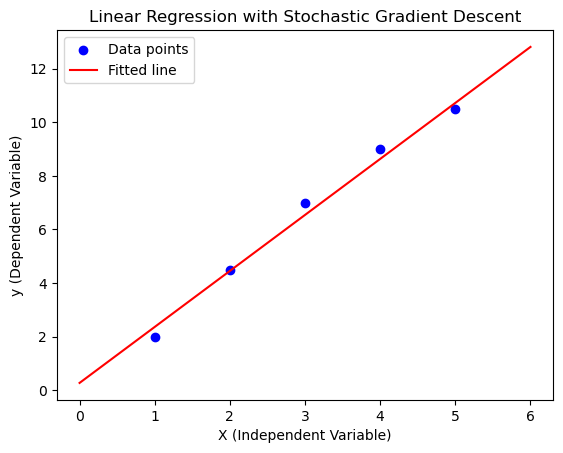

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# New sample dataset with a bit of non-linearity
X = np.array([1, 2, 3, 4, 5])  # Independent variable, e.g., hours studied
y = np.array([2, 4.5, 7, 9, 10.5])  # Dependent variable, e.g., exam scores

# Parameters initialization
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.01
epochs = 1000  # Number of iterations

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        # Predicted value
        y_pred = theta_0 + theta_1 * X[i]
        # Gradient calculation
        grad_theta_0 = -2 * (y[i] - y_pred)  # Gradient w.r.t. theta_0
        grad_theta_1 = -2 * X[i] * (y[i] - y_pred)  # Gradient w.r.t. theta_1
        # Parameters update
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1

# Print the final parameters
print(f"theta_0 (Intercept): {theta_0}, theta_1 (Slope): {theta_1}")

# Plotting the dataset and the fitted line
plt.scatter(X, y, color='blue', label='Data points')
x_model = np.linspace(0, 6, 100)
y_model = theta_0 + theta_1 * x_model
plt.plot(x_model, y_model, color='red', label='Fitted line')

plt.title('Linear Regression with Stochastic Gradient Descent')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()


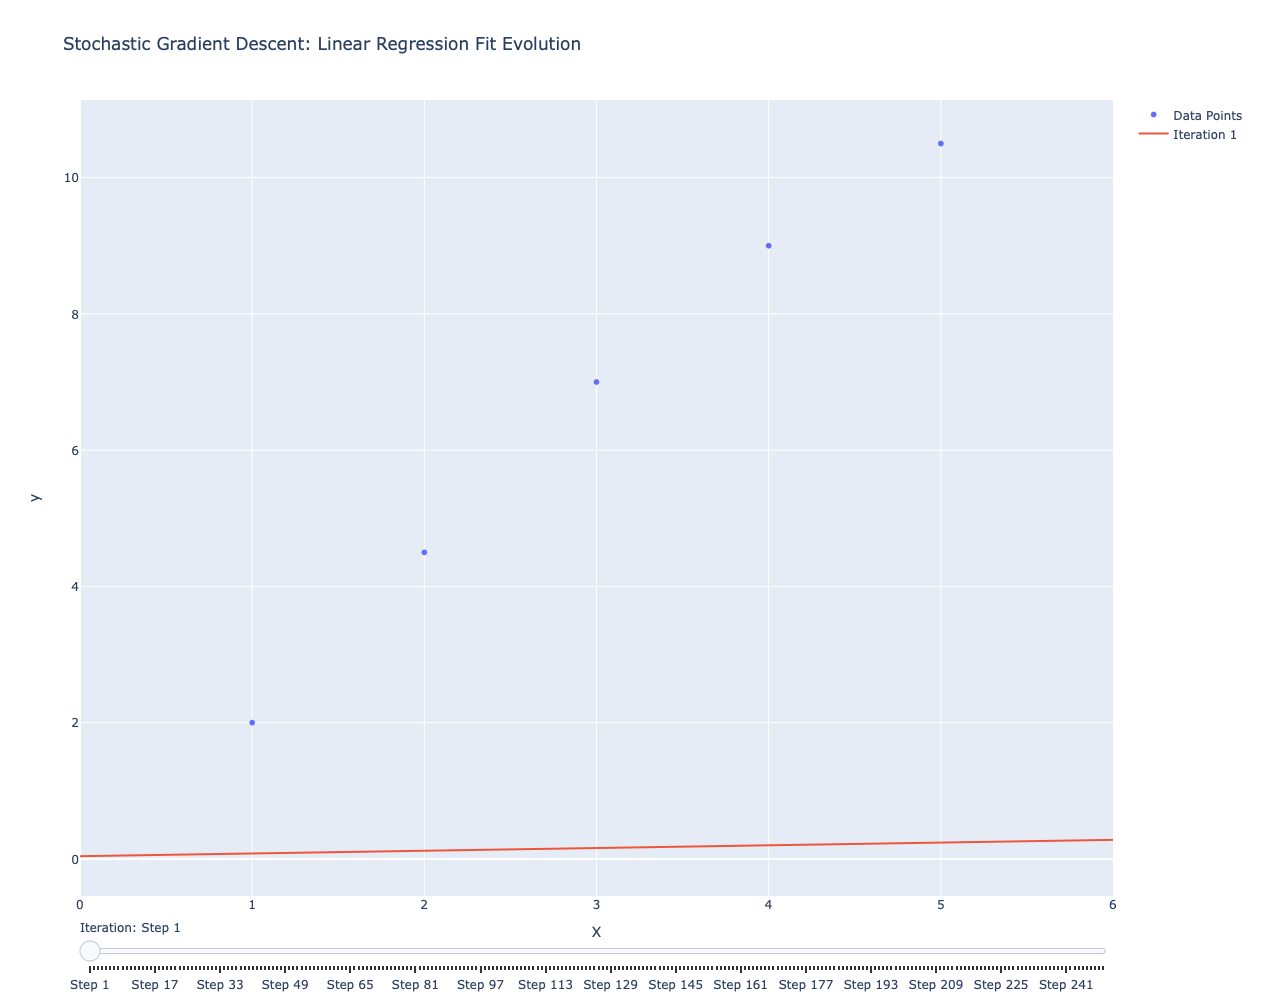

In [17]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Sample dataset
X = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4.5, 7, 9, 10.5])  # Dependent variable

# Parameters initialization
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.01
epochs = 50  # Adjusted for visualization purposes

# To store history for visualization
theta_0_history = []
theta_1_history = []

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        y_pred = theta_0 + theta_1 * X[i]
        grad_theta_0 = -2 * (y[i] - y_pred)  # Gradient w.r.t. theta_0
        grad_theta_1 = -2 * X[i] * (y[i] - y_pred)  # Gradient w.r.t. theta_1
        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)

# Creating the Plotly figure
fig = make_subplots()

# Adding the scatter plot of the dataset
fig.add_trace(go.Scatter(x=X, y=y, mode='markers', name='Data Points'))

# Generating the x values for the line plot
x_model = np.linspace(0, 6, 100)

# Adding traces for each iteration with a fitted line, initially hidden
for i in range(len(theta_0_history)):
    y_model = theta_0_history[i] + theta_1_history[i] * x_model
    fig.add_trace(go.Scatter(x=x_model, y=y_model, mode='lines', name=f'Iteration {i+1}', visible=False))

# Make the first iteration visible
fig.data[1].visible = True

# Create and add slider
steps = []
for i, trace in enumerate(fig.data[1:]):  # Skipping the first trace which is the scatter plot
    step = dict(
        method="update",
        args=[{"visible": [False] + [False] * len(theta_0_history)}],
        label=f"Step {i+1}"
    )
    step["args"][0]["visible"][0] = True  # Always show scatter plot
    step["args"][0]["visible"][i+1] = True  # Show ith iteration
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Iteration: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Stochastic Gradient Descent: Linear Regression Fit Evolution",
    xaxis_title="X",
    yaxis_title="y",
    height=1000,  # Set the height of the plot
    width=1200  # Set the width of the plot
)

fig.show()
